## Задание 1

0.9599999999999997 -0.7399999999999998


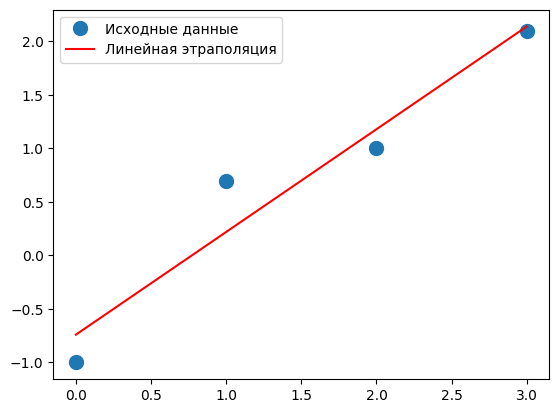

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

#первый порядок
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.7, 1, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная этраполяция')
plt.legend()
plt.show()







[-5.39706489 -3.53430308 -2.73784229 -2.42205637 -1.38191387  0.17641954
  0.84953945  2.00454477  2.53879384  3.97688237  5.46526246]
[25.03520478 15.63796909  8.97821241  3.66565168  1.24350575 -0.10323531
  1.1053915   4.11787937  9.17742975 15.795535   25.1497507 ]


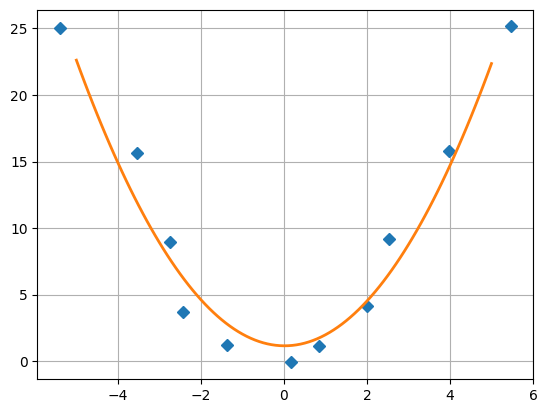

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

#второй порядок
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]



x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('p.png')

[-4.79776389 -4.30306263 -3.21855852 -1.68892656 -1.38107345  0.40801611
  0.7005667   2.41073639  3.46579955  3.58013996  5.36403257]
[24.9899769  15.89340412  8.5330868   3.98180145  0.72335139  0.49274612
  0.70325378  4.12981241  9.08623794 16.13472505 25.24417164]


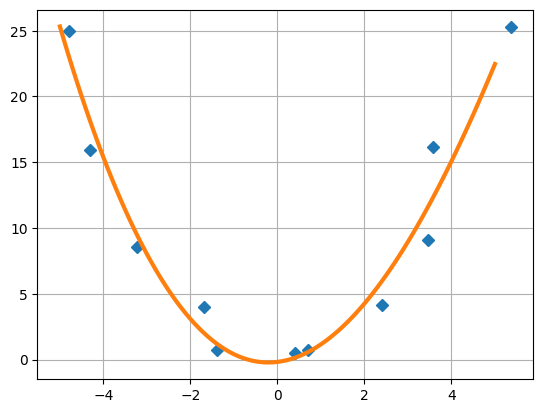

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

#второй порядок
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)

m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 + s[1] * x_prec**2 +s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('pol.png')

## Задание 2

[0.23647491 0.75182398]
0.0001292074317378502
0.13538081996727638


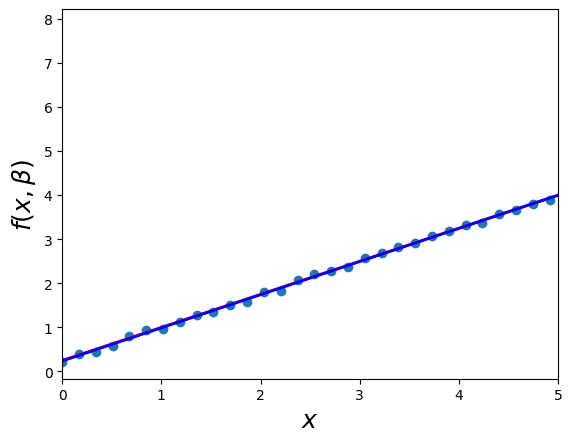

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
from scipy.optimize import curve_fit
import scipy as sp
#1
#добавим шума в данные, сделанные по функции f(x, b) с коэф. b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 10, 60)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.02077805 2.97359548 2.00346737]
0.0003758528150455489
0.05306588155052957


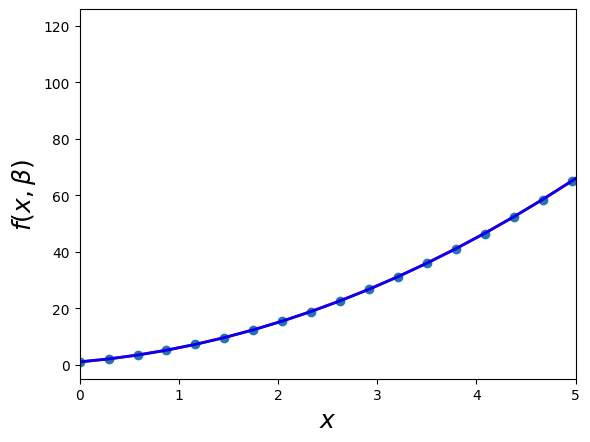

In [35]:
#2
beta = (1, 3, 2)
def f(x, b0, b1, b2):
    return b0 + b1 * x +b2 * x * x

xdata = np.linspace(0, 7, 25)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.97448443 2.02138952]
0.000261969774252335
0.062228567120626715


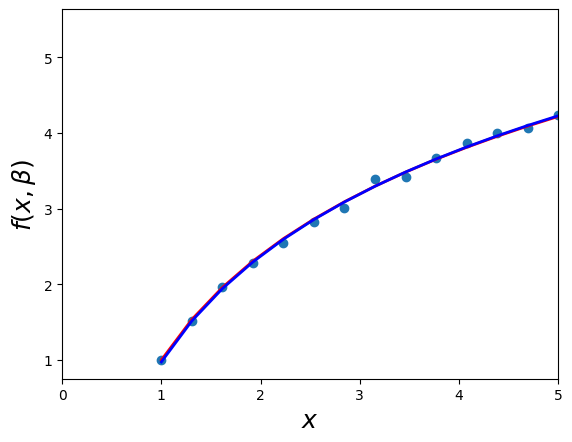

In [36]:
#3
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 9, 27)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.98116008 2.03281549]
-9.006875323331683e-05
0.09215926956338553


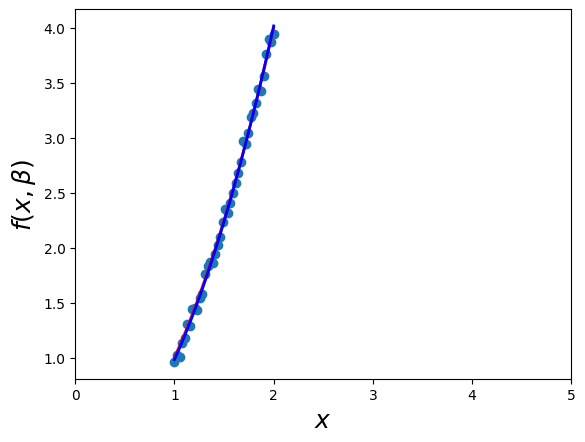

In [37]:
#4
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 2, 40)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## Задание 3

(30, 2)


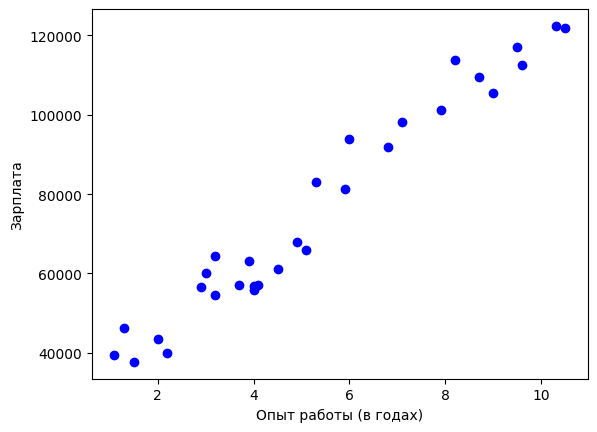

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


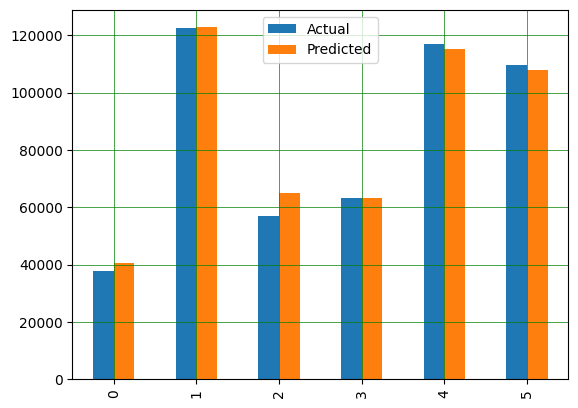

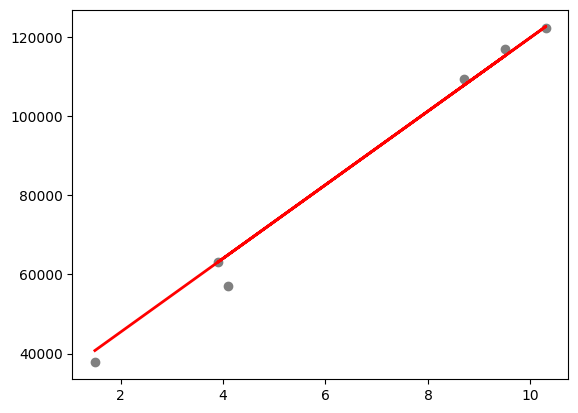

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label = 'Данные о заработке')
plt.xlabel("Опыт работы (в годах)")
plt.ylabel("Зарплата")
plt.show()

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values
print(X)
print(Y)

#наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#обучение регрессии
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
#сравнение
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df
#визуализация результата
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#линия регрессии
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()